In [4]:
import numpy as np 
import pickle as pkl
import matplotlib.pyplot as plt
import os,sys,copy,scipy,scipy.io
import seaborn as sns
sns.set()
%matplotlib inline

# import data
dataset = scipy.io.loadmat('qm7.mat')

# split

split = 3

# load the model from disk

nn = pkl.load(open('nn-%d.pkl'%split,'r'))


print('results after %d iterations' % nn.nbiter)

Ptrain = dataset['P'][range(0,split)+range(split+1,5)].flatten()
Ptest  = dataset['P'][split]
score = {}

for P,name in zip([Ptrain,Ptest],['training','test']):
    # --------------------------------------------
    # Extract test data
    # --------------------------------------------
    X = dataset['X'][P]
    T = dataset['T'][0,P]

    # --------------------------------------------
    # Test the neural network
    # --------------------------------------------
    print('\n%s set:'%name)
    Y = np.array([nn.forward(X) for _ in range(10)]).mean(axis=0)
    mae = np.abs(Y-T).mean(axis=0)
    rmse = np.square(Y-T).mean(axis=0)**.5
    print('MAE:  %5.2f kcal/mol'%mae)
    print('RMSE: %5.2f kcal/mol'%rmse)
    score[name] = [mae, rmse]

results after 1000000 iterations

training set:
MAE:   1.19 kcal/mol
RMSE:  1.78 kcal/mol

test set:
MAE:   2.75 kcal/mol
RMSE:  5.34 kcal/mol


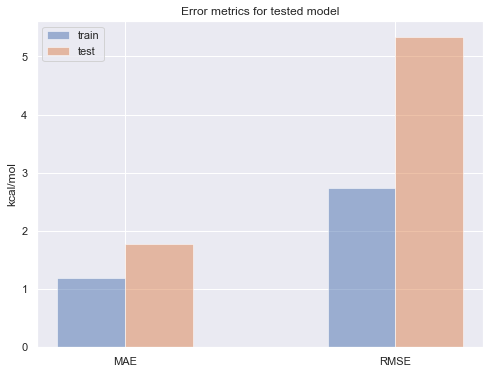

In [5]:
pos = list(range(len(score)))
width = 0.25

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pos,[score['training'][0], score['test'][0]],width,alpha=0.5, label='mae')
plt.bar([p + 1*width for p in pos], [score['training'][1], score['test'][1]],width, alpha=0.5, label='rmse')

ax.set_title('Error metrics for tested model')
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(['MAE', 'RMSE'])
ax.set_ylabel('kcal/mol')

# Adding the legend and showing the plot
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
# Test
from sklearn import metrics 

predictions = model.predict(X_test)
scores = model.evaluate(X_test, y_test)
errors = {}

errors['mean_absolute_error'] = metrics.mean_absolute_error(y_test, predictions)
errors['mean_squared_error'] = metrics.mean_squared_error(y_test, predictions)


# fig, ax = plt.subplots(1, 1, figsize=(8,6))
# ax.bar(['train', 'test'], [train_scores['mean_absolute_error'], test_scores['mean_absolute_error']])
# #ax[1].bar(['mae', 'pearsons_r2'], test_scores)
# plt.title("Kernel ridge regression")
# plt.ylabel("mean absolute error")
# plt.show()

results = pd.DataFrame(predictions, columns = ['y_pred'])
results['y_true'] = y_test
sns.pairplot(results, x_vars='y_true', y_vars='y_pred', height=7, aspect=1, kind='reg')
plt.title("Neural network model")
plt.annotate('$R^2$=%.2f, MAE=%.2f' % (metrics.r2_score(y_test, predictions), 
                                       metrics.mean_absolute_error(y_test, predictions)), 
                                    xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()